<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Model Evalution of Loan Data  By: Kaushik Rathod

## Problem Statment
      
  - Identify Best ROI for different types of Loan applications with help of given dataset, given dataset has many types of loan applications with ROI
  - We needs to create a different types of model and analyze which will best for this
  
  ### Which is the best Interest Rate for agency to provide there customer based on applications?
  
  
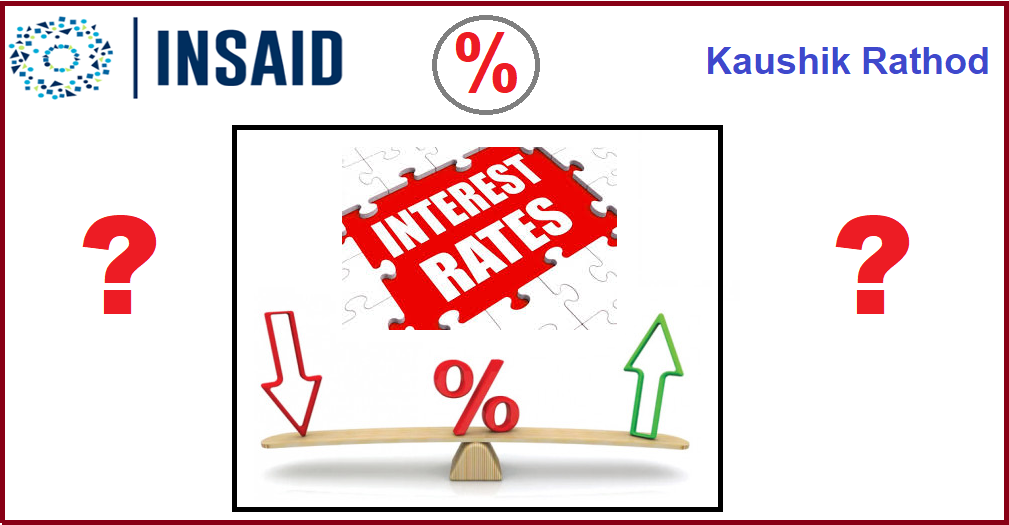
  
  

# Import Library

In [2]:
# Import libraries 
import numpy as np                    
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import warnings
import seaborn as sns


# Numpy Setting 
np.set_printoptions(precision=4)     #To set values upto Four decimal places.

# Pandas Setting
pd.set_option('mode.chained_assignment', None)      # To Hide pandas warnings

# Matplotlib Setting
plt.style.use('seaborn-whitegrid')    # To apply seaborn whitegrid style to the plots.
plt.rc('figure', figsize=(10, 8))     # Set the default figure size of plots.
%matplotlib inline

# Warnings Setting
warnings.filterwarnings("ignore")     # To suppress all the warnings in the notebook.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import Data
- Taken Dataset from Git Hub for EDA and analysis

https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/loans%20data.csv

## Feature Details of the Dataset

| Column Name                     | Description                                                                               |
|:------------------------------- |:------------------------------------------------------------------------------------------| 
| ID                              | ID of the applicant.                                                                      | 
| Amount.Requested                | The amount (in dollars) requested in the loan application.                                |
| Amount.Funded.By.Investors      | The amount (in dollars) loaned to the individual.                                         | 
| Interest.Rate                   | The lending interest rate.                                                                |
| Loan.Length                     | The length of time (in months) of the loan.                                               |
| Loan.Purpose                    | The purpose of the loan as stated by the applicant.                                       |
| Debt.to.Income.Ratio            | The percentage of consumer’s gross income that goes toward paying debts.                  |
| State                           | The abbreviation for the U.S. state of residence of the loan applicant.                   |
| Home.Ownsership                 | A variable indicating whether the applicant owns, rents, or has a mortgage on their home. |
| Monthly.Income                  | The monthly income of the applicant (in dollars).                                         |
| FICO.Range                      | A range indicating the applicants FICO score. This is a measure of the creditworthiness of the applicant.                                                                                                                |
| Open.CREDIT.Lines               | The number of open lines of credit the applicant had at the time of application.          |
| Revolving.CREDIT.Balance        | The total amount outstanding all lines of credit.                                         |
| Inquiries.in.the.Last.6.Months  | When a person applies for credit, they authorize the lender to “inquire” about their creditworthiness. This is the number of such authorized queries in the 6 months before the loan was issued.                   |
| Employment.Length               | Length of time employed at current job.                                                   |


In [3]:
sfilename = "loans%20data"
print("Processing for Dataset :", sfilename)
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/'+ sfilename +'.csv')

Processing for Dataset : loans%20data


# EDA on Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2499 non-null   object 
 2   Amount.Funded.By.Investors      2499 non-null   object 
 3   Interest.Rate                   2500 non-null   object 
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2499 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2497 non-null   float64
 10  FICO.Range                      2500 non-null   object 
 11  Open.CREDIT.Lines               2496 non-null   object 
 12  Revolving.CREDIT.Balance        24

In [5]:
data.shape

(2500, 15)

In [6]:
data.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


## Profiling Data before Data Preprocessing

In [7]:
profile = data.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="Preprocessing_"+ sfilename +".html")

## Data Pre Processing Overview
__Dataset analysis__

- Number of variables: 15
- Number of observations: 2500
- Missing cells (%): 0.3%
- Duplicate rows (%): 0.0%

__Data Types__

- Numeric = 3 
- Categorical = 12

__Needs to Change Data Types, Converting below columns to Numeric__

    - Interest.Rate
    - Debt.To.Income.Ratio
    - Amount.Requested
    - Open.CREDIT.Lines
    - Revolving.CREDIT.Balance
    - Inquiries.in.the.Last.6.Months
    - Interest.Rate
    
__Needs to Remove Some Columns__

    - ID which has unique Value
    - Amount.Funded.By.Investors which has almost same value as requested so we can ignore
    
__Other Analysis__

- **Employment.Length** has **78 (3.1%) missing** values.


- **Home.Ownership** has **99.7%** samples belonging to **3** categories:
 
  - MORTGAGE: 1147 samples (45.9% share)	 
 
  - RENT: 1146 samples (45.8% share)	 
  
  - OWN: 200 samples (8.0% share)


- **Inquiries.in.the.Last.6.Months** has data divided into **10** distinct values.

  - The distribution is positive (right) skewed with **skewness** value **2.0421**.
  
  - **95%** values lie in the range between **0 to 3**.
  
  - __0__ is the most common value with a frequency of **50%**.


- **Loan.Length** has **99.9%** samples belonging to **2** categories:
 
  - 36 months: 1950 samples (78.0% share)	 
 
  - 60 months: 548 samples (21.9% share)	
  
    
- **Loan.Purpose** has data divided into **14** distinct categories.

  - The category **debt_consolidation** has the highest share with **1307** samples **(52.3% share)**.
  
  - Then categories **credit_card**	has **444** samples **(17.8% share)**, **other** has **200** samples **(8.0% share)**, **home_improvement** has **152** samples **(6.1% share)**.


- **Monthly.Income** has a **skewness** of **8.4714** and **kurtosis** of **167.49**.

  - The distribution is positive (right) skewed.
  
  - The high value of **kurtosis** implies that the tail is very long and there is a presence of outliers in the data.
  
  - **95%** samples have a **Monthly.Income** less than **11667**.
  
  - **Interquartile range (IQR)** is **3300** and **mean** is **5689.7**, so extreme outliers will be after ```mean + (3 * IQR)``` ie. **15589.7**
  

- **State** has very **high cardinality** as there are **47 distinct** values in the dataset.

### Make a copy of original data and use new for future

In [8]:
data_new = data.copy(deep=True)   #make a copy of original data

### Dropping Unwanted Columns as per profiling

In [9]:
data_new.ID.nunique() #ID column has unique value so no use for Modeling

2499

In [10]:
data_new['State']
data_new['State'].nunique()
data_new['State'].head() 
#State has many value which is irrelevant

0    SC
1    TX
2    CA
3    KS
4    NJ
Name: State, dtype: object

In [11]:
data_new[['Amount.Funded.By.Investors','Amount.Funded.By.Investors']].head(50)
#Also dropping Amount.Funded.By.Investors column because it has a very strong correlation with Amount.Requested column
#Column most place represent same value so no use

,Amount.Funded.By.Investors,Amount.Funded.By.Investors
0,20000,20000
1,19200,19200
2,35000,35000
3,9975,9975
4,12000,12000
5,6000,6000
6,10000,10000
7,33450,33450
8,14675,14675
9,7000,7000


In [12]:
#Removing ID column
data_new.drop(['ID'], 1, inplace=True)

#Removing State column
data_new.drop(['State'], 1, inplace=True)

#Removing State column
data_new.drop(['Amount.Funded.By.Investors'], 1, inplace=True)

In [13]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   object 
 1   Interest.Rate                   2500 non-null   object 
 2   Loan.Length                     2499 non-null   object 
 3   Loan.Purpose                    2499 non-null   object 
 4   Debt.To.Income.Ratio            2499 non-null   object 
 5   Home.Ownership                  2499 non-null   object 
 6   Monthly.Income                  2497 non-null   float64
 7   FICO.Range                      2500 non-null   object 
 8   Open.CREDIT.Lines               2496 non-null   object 
 9   Revolving.CREDIT.Balance        2497 non-null   object 
 10  Inquiries.in.the.Last.6.Months  2497 non-null   float64
 11  Employment.Length               2422 non-null   object 
dtypes: float64(2), object(10)
memory u

In [14]:
data_new['Interest.Rate']

0        8.90%
1       12.12%
2       21.98%
3        9.99%
4       11.71%
         ...  
2495    16.77%
2496    14.09%
2497    13.99%
2498    12.42%
2499    13.79%
Name: Interest.Rate, Length: 2500, dtype: object

### Replacing % with blank to convert columns to float

In [15]:
data_new['Interest.Rate'] = data_new['Interest.Rate'].str.replace('%', '').astype(float) #convert to float

In [16]:
data_new['Debt.To.Income.Ratio'] = data_new['Debt.To.Income.Ratio'].str.replace('%', '').astype(float)

In [17]:
data_new.head()

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000,8.90,36 months,debt_consolidation,14.90,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,19200,12.12,36 months,debt_consolidation,28.36,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,35000,21.98,60 months,debt_consolidation,23.81,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,10000,9.99,36 months,debt_consolidation,14.30,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,12000,11.71,36 months,credit_card,18.78,RENT,3195.00,695-699,11,14469,0.0,9 years


### Converting other columns to numeric

In [18]:
# Convert to numeric
for col in ['Amount.Requested','Open.CREDIT.Lines','Revolving.CREDIT.Balance',
           'Inquiries.in.the.Last.6.Months','Interest.Rate']:
           data_new[col] = pd.to_numeric(data_new[col], errors = 'coerce')

In [19]:
data_new.isnull().sum()

Amount.Requested                   5
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  9
Revolving.CREDIT.Balance           5
Inquiries.in.the.Last.6.Months     3
Employment.Length                 78
dtype: int64

In [20]:
data_new.shape

(2500, 12)

### Dropping rows with null values

In [21]:
data_new.dropna(inplace=True)          ##Dropping rows with null values
data_new.reset_index(drop=True,inplace=True)
data_new.shape

(2399, 12)

In [22]:
data_new.isnull().sum()

Amount.Requested                  0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
Home.Ownership                    0
Monthly.Income                    0
FICO.Range                        0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64

### Converting Employment.Length to Numeric, replacing years and other character with blank

In [23]:
data_new['Employment.Length'].value_counts()

10+ years    648
< 1 year     245
2 years      242
3 years      234
5 years      200
4 years      189
1 year       176
6 years      160
7 years      124
8 years      108
9 years       71
.              2
Name: Employment.Length, dtype: int64

In [24]:
data_new['Employment.Length'] = data_new['Employment.Length'].astype('str')
data_new['Employment.Length'] = data_new['Employment.Length'].str.replace(' years', '').str.replace(' year', '')
data_new['Employment.Length'] = data_new['Employment.Length'].str.replace('< 1', '0').str.replace('.', '1').str.replace('+', '')

In [25]:
data_new['Employment.Length'].value_counts()

10    648
0     245
2     242
3     234
5     200
4     189
1     178
6     160
7     124
8     108
9      71
Name: Employment.Length, dtype: int64

In [26]:
data_new['Employment.Length'] = pd.to_numeric(data_new['Employment.Length'], errors='coerce')

In [27]:
data_new.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                   int64
dtype: object

### Converting Loan.Length to Numeric, only one . value updating 36 months as per mode

In [28]:
data_new['Loan.Length'].value_counts()

36 months    1862
60 months     536
.               1
Name: Loan.Length, dtype: int64

In [29]:
data_new[data_new['Loan.Length'] == '.']

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
59,13500.0,14.33,.,debt_consolidation,31.7,RENT,4166.67,680-684,11.0,31168.0,0.0,1


In [30]:
# Replacing the '.' value from the Loan.Length column with the mode value of '36 months'.
data_new.iloc[data_new[data_new['Loan.Length'] == '.'].index,2] =  '36 months'

In [31]:
data_new['Loan.Length'].value_counts()

36 months    1863
60 months     536
Name: Loan.Length, dtype: int64

In [32]:
data_new['Loan.Length'] = data_new['Loan.Length'].str.replace(' months', '').astype(int)

In [33]:
data_new.head()

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,8.90,36,debt_consolidation,14.90,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,0
1,19200.0,12.12,36,debt_consolidation,28.36,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2
2,35000.0,21.98,60,debt_consolidation,23.81,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2
3,10000.0,9.99,36,debt_consolidation,14.30,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5
4,12000.0,11.71,36,credit_card,18.78,RENT,3195.00,695-699,11.0,14469.0,0.0,9


### Study Relationship of Employment.Length & Interest.Rate

In [34]:
round(data_new.groupby('Employment.Length')['Interest.Rate'].mean(), 2)

Employment.Length
0     12.92
1     12.50
2     12.86
3     12.79
4     13.13
5     13.39
6     13.23
7     13.09
8     13.01
9     13.25
10    13.35
Name: Interest.Rate, dtype: float64

### Creating a dictionary to encode all the different values in Loan.Purpose column to numerical values.

In [35]:
# Creating a dictionary to encode all the different values in Loan.Purpose column to numerical values.
a = round(data_new.groupby('Loan.Purpose')['Interest.Rate'].mean())
a = a.astype('int64')
a = a - 10
a.sort_values(inplace=True)
lp_encoding = a.to_dict()
lp_encoding

{'renewable_energy': 0,
 'car': 1,
 'educational': 1,
 'major_purchase': 1,
 'home_improvement': 2,
 'medical': 2,
 'vacation': 2,
 'wedding': 2,
 'credit_card': 3,
 'house': 3,
 'other': 3,
 'small_business': 3,
 'debt_consolidation': 4,
 'moving': 4}

In [36]:
# Using the map function to apply the numerical values to the Loan.Purpose column.
data_new['Loan.Purpose'] = data_new['Loan.Purpose'].map(lp_encoding)
data_new.head()


,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,8.90,36,4,14.90,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,0
1,19200.0,12.12,36,4,28.36,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2
2,35000.0,21.98,60,4,23.81,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2
3,10000.0,9.99,36,4,14.30,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5
4,12000.0,11.71,36,3,18.78,RENT,3195.00,695-699,11.0,14469.0,0.0,9


In [37]:
data_new['Loan.Purpose'].nunique()

5

### Using pandas get_dummies function to create dummy variables for the 5 different categories of Loan.Purpose column.

In [38]:
# Using drop_first=True will automatically drop the first column of the dummy variables dataframe. (We'll get only 4 columns)
# We drop one column from the dummy variables in order to avoid multicollinearity.
lp_dummies = pd.get_dummies(data_new['Loan.Purpose'], prefix = 'LP', drop_first=True)
lp_dummies.head()

,LP_1,LP_2,LP_3,LP_4
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0


In [39]:
# Concatenating the dummy variables into the dataset.
data_new = pd.concat([data_new,lp_dummies], 1)

### Dropping the Loan.Purpose column.

In [40]:
#Removing Loan.Purpose
data_new.drop(['Loan.Purpose'], 1, inplace=True)

In [41]:
data_new.head()

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,LP_1,LP_2,LP_3,LP_4
0,20000.0,8.90,36,14.90,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,0,0,0,0,1
1,19200.0,12.12,36,28.36,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2,0,0,0,1
2,35000.0,21.98,60,23.81,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2,0,0,0,1
3,10000.0,9.99,36,14.30,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5,0,0,0,1
4,12000.0,11.71,36,18.78,RENT,3195.00,695-699,11.0,14469.0,0.0,9,0,0,1,0


In [42]:
data_new['Home.Ownership'].value_counts()

RENT        1107
MORTGAGE    1100
OWN          187
OTHER          5
Name: Home.Ownership, dtype: int64

### Creating two new columns representing the values MORTGAGE and RENT from the Home.Ownership column.

In [43]:
#Adding two columns
data_new['ho_mort'] = np.where(data_new['Home.Ownership'] == 'MORTGAGE', 1, 0)
data_new['ho_rent'] = np.where(data_new['Home.Ownership'] == 'RENT', 1, 0)

### Dropping the Home.Ownership column.

In [44]:
# Dropping the Home.Ownership column.
data_new.drop(['Home.Ownership'], 1, inplace=True)

In [45]:
data_new['FICO.Range'].head()

0    735-739
1    715-719
2    690-694
3    695-699
4    695-699
Name: FICO.Range, dtype: object

### Using str.split method to get the FICO.Range values, taken avg of that

In [46]:
# Spliting with - and taking Mean of FICO.Range values to adding new column fico as Int
# Mean of FICO.Range values:
data_new['fico'] = ((data_new['FICO.Range'].str.split('-').str[0].astype(int) + data_new['FICO.Range'].str.split('-').str[1].astype(int) ) / 2).astype(int)
data_new['fico']

0       737
1       717
2       692
3       697
4       697
       ... 
2394    687
2395    707
2396    742
2397    682
2398    672
Name: fico, Length: 2399, dtype: int32

In [47]:
data_new.head()

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,LP_1,LP_2,LP_3,LP_4,ho_mort,ho_rent,fico
0,20000.0,8.90,36,14.90,6541.67,735-739,14.0,14272.0,2.0,0,0,0,0,1,1,0,737
1,19200.0,12.12,36,28.36,4583.33,715-719,12.0,11140.0,1.0,2,0,0,0,1,1,0,717
2,35000.0,21.98,60,23.81,11500.00,690-694,14.0,21977.0,1.0,2,0,0,0,1,1,0,692
3,10000.0,9.99,36,14.30,3833.33,695-699,10.0,9346.0,0.0,5,0,0,0,1,1,0,697
4,12000.0,11.71,36,18.78,3195.00,695-699,11.0,14469.0,0.0,9,0,0,1,0,0,1,697


### Dropping the FICO.Range column.

In [48]:
# Dropping the FICO.Range column.
data_new.drop(['FICO.Range'], 1, inplace=True)

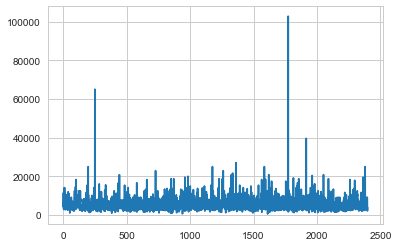

In [49]:
data_new['Monthly.Income'].plot()

In [50]:
def BoxPlot(col,Xlabel,Ylabel,Title,IsSharex=False):
    
    if IsSharex :
        data_new[col].plot(kind='box', figsize=(15,8), subplots=True, 
         sharex=True, 
         title=Title)
    else:
        data_new[col].plot(kind='box',label = Xlabel, figsize=(10,10),fontsize=20)
        plt.ylabel(Ylabel,fontsize=20)
        plt.title(Title,fontsize=20);   
    
def Plot(kind,col,Xlabel,Ylabel,Title):
        data_new[col].plot(kind=kind,label = Xlabel, figsize=(10,10),fontsize=20)
        plt.ylabel(Ylabel,fontsize=20)
        plt.title(Title,fontsize=20); 
   


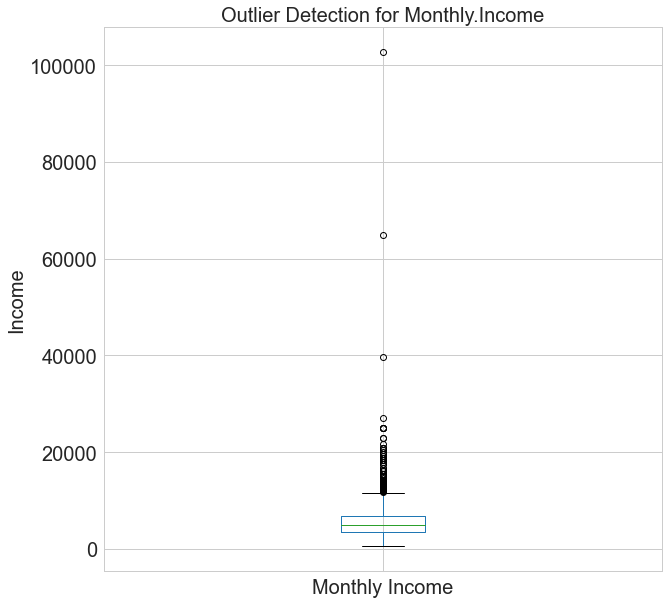

In [51]:
# Draw a box plot for Monthly.Income variable
BoxPlot('Monthly.Income','Monthly Income','Income','Outlier Detection for Monthly.Income')

In [52]:
data_new['Monthly.Income'].sort_values(ascending=False ).head(10)

1773    102750.00
250      65000.00
1915     39583.33
1361     27083.33
1585     25000.00
1176     25000.00
2379     25000.00
197      25000.00
1261     22916.67
728      22916.67
Name: Monthly.Income, dtype: float64

In [53]:
data_new[data_new['Monthly.Income'] > 35000]

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,LP_1,LP_2,LP_3,LP_4,ho_mort,ho_rent,fico
250,4500.0,6.91,36,0.58,65000.00,7.0,3015.0,4.0,7,1,0,0,0,1,0,727
1773,33000.0,7.62,36,0.26,102750.00,7.0,95435.0,0.0,10,0,0,0,1,1,0,807
1915,35000.0,16.29,36,17.17,39583.33,14.0,55965.0,2.0,10,0,0,0,1,1,0,707


### Removing rows above 35000 of Monthly Income

In [54]:
data_new.drop(data_new[data_new['Monthly.Income'] > 35000].index,inplace=True)

In [55]:
data_new[data_new['Monthly.Income'] > 35000]

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,LP_1,LP_2,LP_3,LP_4,ho_mort,ho_rent,fico


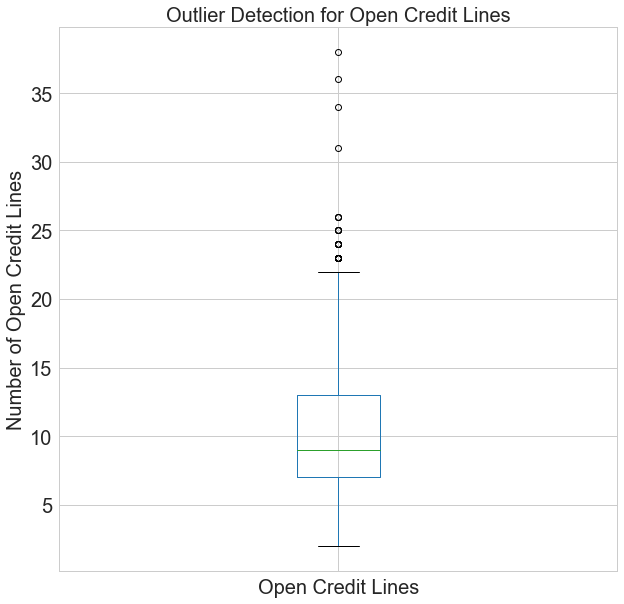

In [56]:
BoxPlot('Open.CREDIT.Lines','Open Credit Lines','Number of Open Credit Lines','Outlier Detection for Open Credit Lines')  

In [57]:
data_new['Open.CREDIT.Lines'].sort_values(ascending=False ).head(10)

818     38.0
2313    36.0
1744    34.0
659     31.0
2319    26.0
1516    26.0
397     26.0
982     25.0
2133    25.0
2100    25.0
Name: Open.CREDIT.Lines, dtype: float64

### Dropping values having Open.CREDIT.Lines more than 30

In [58]:
# Dropping values having Open.CREDIT.Lines more than 30.
data_new.drop(data_new[data_new['Open.CREDIT.Lines'] > 30].index, inplace=True)

In [59]:
data_new.head()

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,LP_1,LP_2,LP_3,LP_4,ho_mort,ho_rent,fico
0,20000.0,8.90,36,14.90,6541.67,14.0,14272.0,2.0,0,0,0,0,1,1,0,737
1,19200.0,12.12,36,28.36,4583.33,12.0,11140.0,1.0,2,0,0,0,1,1,0,717
2,35000.0,21.98,60,23.81,11500.00,14.0,21977.0,1.0,2,0,0,0,1,1,0,692
3,10000.0,9.99,36,14.30,3833.33,10.0,9346.0,0.0,5,0,0,0,1,1,0,697
4,12000.0,11.71,36,18.78,3195.00,11.0,14469.0,0.0,9,0,0,1,0,0,1,697


In [60]:
data_new['Revolving.CREDIT.Balance'].sort_values(ascending=False ).head(10)

1164    245886.0
202     217827.0
1619    216561.0
1424    194205.0
1865    175087.0
1875    143151.0
1254    129071.0
1843    128707.0
794     126402.0
850     121563.0
Name: Revolving.CREDIT.Balance, dtype: float64

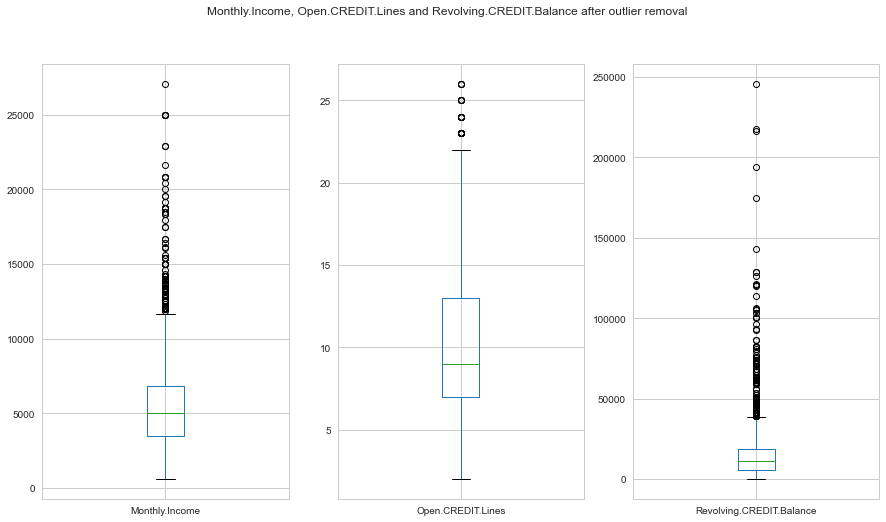

In [61]:
# Draw a boxplot showing the above columns after outlier removal.
BoxPlot(['Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance' ],'','',
        'Monthly.Income, Open.CREDIT.Lines and Revolving.CREDIT.Balance after outlier removal',True)


### Data Post Processing after Data Cleanup 

In [62]:
profile = data_new.profile_report(title='Pandas Profiling after Data Clean-up')
profile.to_file(output_file="Post_Processing_"+ sfilename +".html")

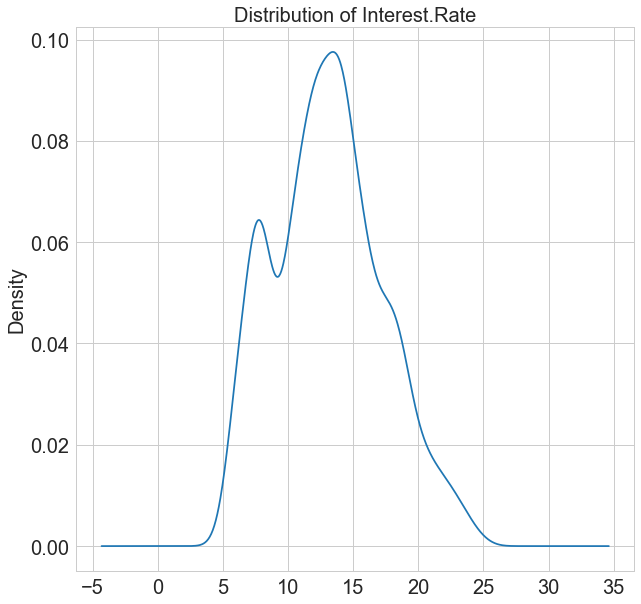

In [63]:
# Plotting Interest.Rate
Plot('density','Interest.Rate','Interest Rate','Density','Distribution of Interest.Rate')
# data_new['Interest.Rate'].plot(kind='density', figsize=(14,6))
# plt.xlabel('Interest Rate')
# plt.title('Distribution of Interest.Rate',);

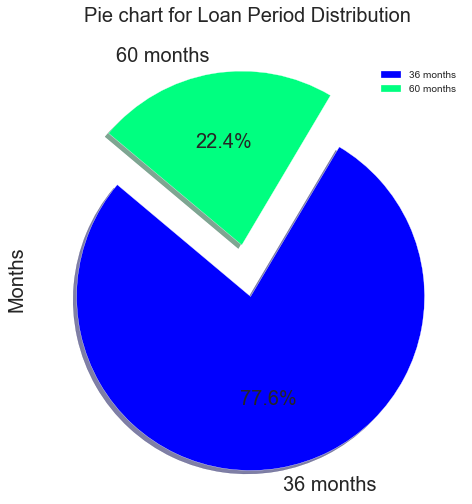

In [64]:
# Plotting Loan.Length's pie chart
data_new['Loan.Length'].value_counts().plot(kind='pie', labels=['36 months','60 months'], explode = (0.1, 0.2), 
                             colormap = 'winter', autopct='%3.1f%%', shadow=True, startangle=140, 
                            legend=True, figsize=(8,8),fontsize=20);
plt.ylabel('Months',fontsize=20)
plt.title('Pie chart for Loan Period Distribution',fontsize=20,pad = 40);   

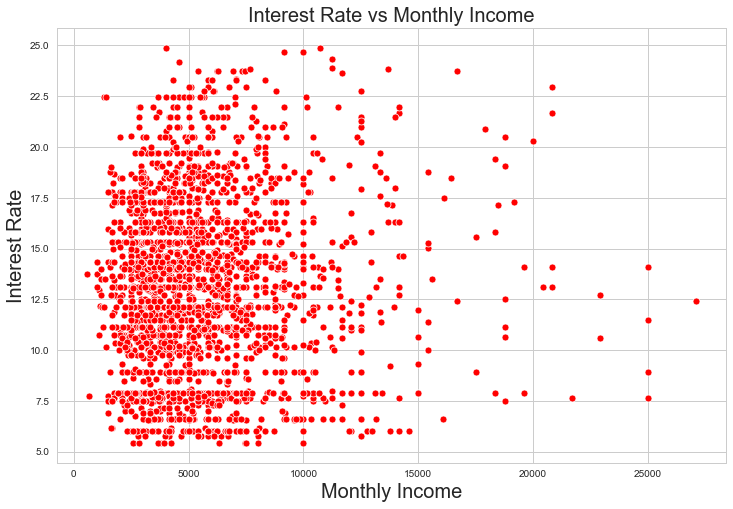

In [65]:
# Ploting Interest.Rate vs Monthly.Income 
plt.figure(figsize=(12,8))
sns.scatterplot(data=data_new, x='Monthly.Income', y='Interest.Rate', color='red')
plt.title('Interest Rate vs Monthly Income' ,fontsize=20);
plt.ylabel('Interest Rate',fontsize=20)
plt.xlabel('Monthly Income',fontsize=20);

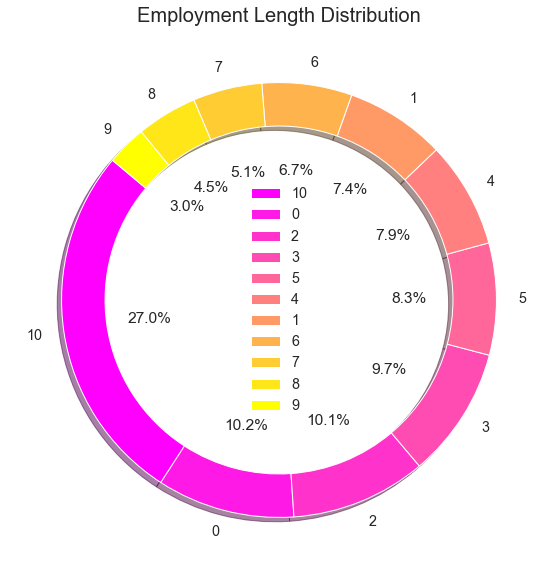

In [77]:
# Plotting Employment.Length
data_new['Employment.Length'].value_counts().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.2),
                                shadow=True,startangle=140, legend=True, figsize=(12,10), cmap='spring')

plt.title('Employment Length Distribution' ,fontsize=20)
plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20);

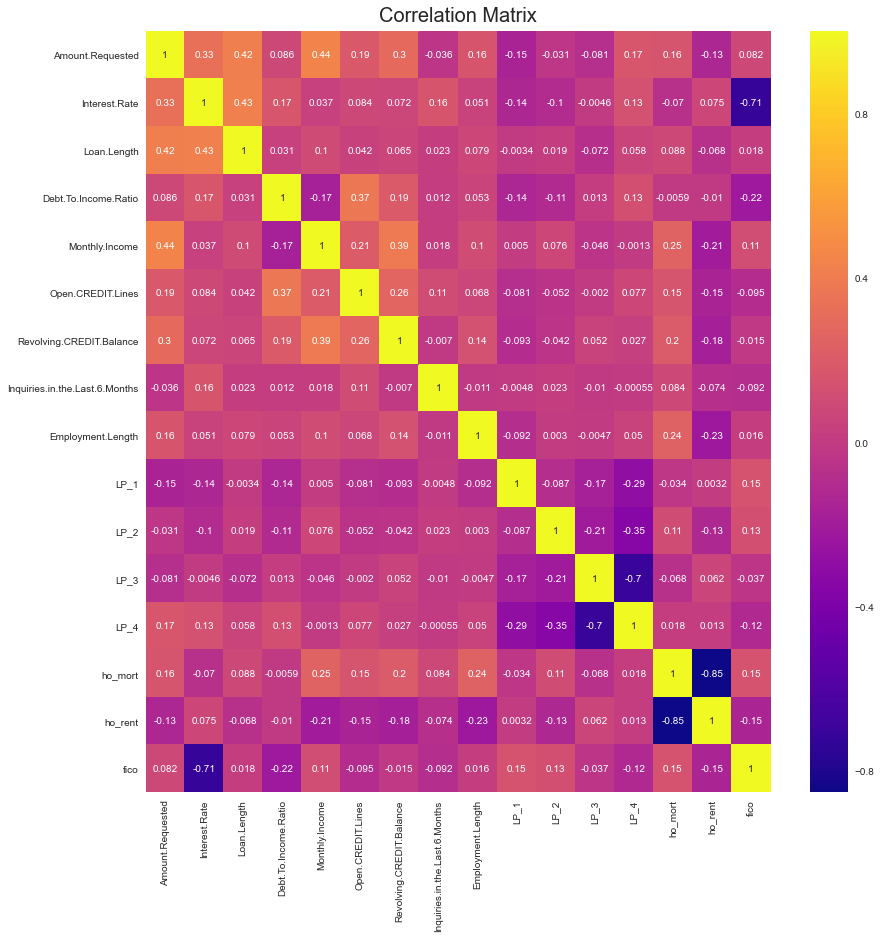

In [67]:
# Plotting the correlation matrix
corr_mat = data_new.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_mat, annot=True, cmap='plasma')
plt.title('Correlation Matrix' ,fontsize=20,pad = 10);
# plt.savefig('Correlation.png')

**Observations from Correlation Matrix** <br>
- The **diagonal** of above matrix shows the **auto-correlation** of variable. It is always equal to 1. 


- **Correlations** can vary from **-1 to +1**. Closer to **+1 means strong positive correlation** and close **-1 means strong negative correlation**. Closer to **0 means not very strongly correlated**. Variables with strong correlations are mostly probable candidates for model builing.


- You can observe from the plot that there is **negative correlation** between **Interest.Rate** and **fico** with a value **-0.71** which implies that as the value of **fico increases** the value of **Interest.Rate decreases**.


- There is a **negative correlation** between **ho_mort** and **ho_rent** columns with a value **-0.85** because both of these column are the **dummy variables** of the column **Home.Ownership** from the original dataset. 
  
  - Since both these columns consists of **91.7%** of the total values in the **Home.Ownership** column and are the **opposite** of each other, that's why they show such a **strong negative correlation**.
  
  - We **can't drop** one of these columns because **jointly** they give information about the **third major category (OWN)** of the **Home.Ownership** column.
  

- There's also a **negative correlation** between **LP_3** and **LP_4** columns with a value **-0.7** because both of these column are the **dummy variables** of the column **Loan.Purpose** from the original dataset. 
  
  - Since both these columns consists of **78.4%** of the total values in the **Loan.Purpose** column and are the **opposite** of each other, that's why they show such a **strong negative correlation**.
  
  - We **can't drop** one of these columns because **jointly** they give information about the **remaining categories** of the **Loan.Purpose** column .

In [68]:
data_new.columns

Index(['Amount.Requested', 'Interest.Rate', 'Loan.Length',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length', 'LP_1', 'LP_2', 'LP_3', 'LP_4', 'ho_mort',
       'ho_rent', 'fico'],
      dtype='object')

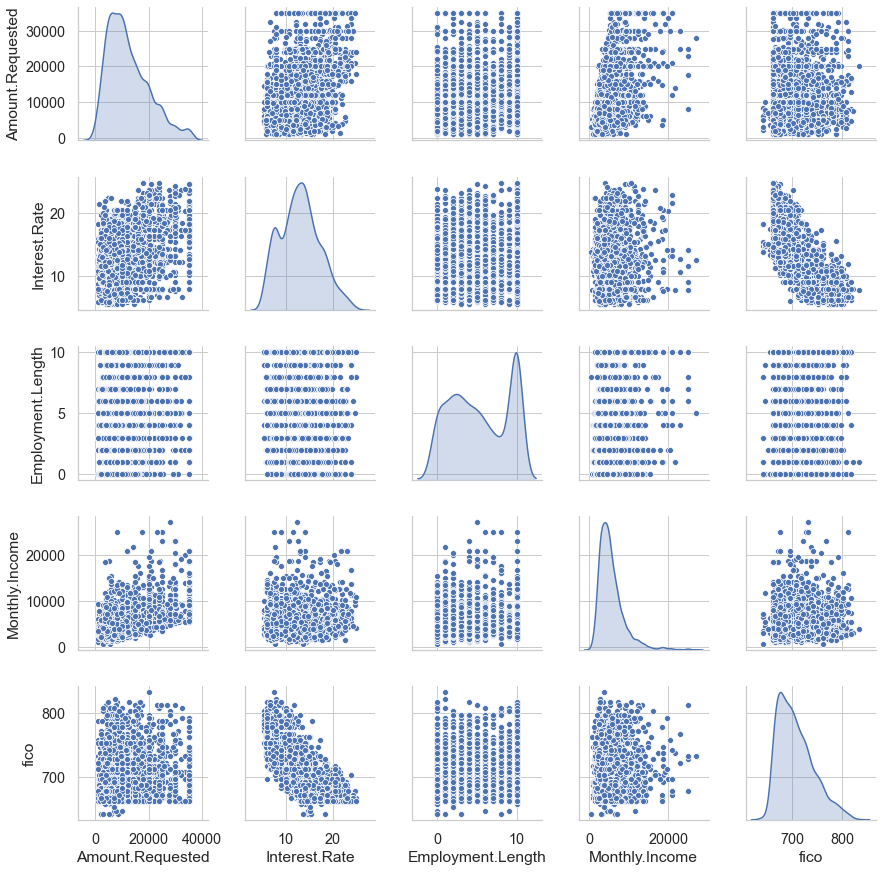

In [69]:
# Using seaborn's pairplot function to plot the pairplot for specific columns of the dataset.
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

sns.pairplot(data=data_new[['Amount.Requested', 'Interest.Rate','Employment.Length','Monthly.Income','fico']], 
             size=2.5, diag_kind='kde');
plt.savefig('pairplot.png')

# Train Test & Split Data for Modeling

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# Splitting the dataset into training and test sets.
data_train, data_test = train_test_split(data_new, test_size = 0.2, random_state = 2)

In [72]:
# Dropping Interest.Rate from x_train and x_test matrices, and creating y_train and y_test vectors for Interest.Rate values.
x_train = data_train.drop(['Interest.Rate'], 1)
y_train = data_train['Interest.Rate']
x_test = data_test.drop(['Interest.Rate'], 1)
y_test = data_test['Interest.Rate']

In [73]:
data_new.columns

Index(['Amount.Requested', 'Interest.Rate', 'Loan.Length',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length', 'LP_1', 'LP_2', 'LP_3', 'LP_4', 'ho_mort',
       'ho_rent', 'fico'],
      dtype='object')

In [74]:
# Creating a list of the names of x_train columns for future use. 
features = x_train.columns
features

Index(['Amount.Requested', 'Loan.Length', 'Debt.To.Income.Ratio',
       'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'LP_1', 'LP_2',
       'LP_3', 'LP_4', 'ho_mort', 'ho_rent', 'fico'],
      dtype='object')

In [ ]:
# Checking the shapes of training and test sets.
print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

## Erros metrics:

- __MAE__(Mean Absolute Error) is the easiest to understand, because it's the __average error.__ 

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


- __MSE__ (Mean Squared Error) is more popular than MAE, because MSE "punishes" larger errors.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


- __RMSE__ ( Root Mean Squared Error) is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.
    Root Mean Squared Error (RMSE)

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

# Linear Regression Model

In [78]:
# Creating our linear regression model and fitting the data into it.
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# Making predictions on the train set.
y_pred_train = linreg.predict(x_train)
y_pred_train[:10]

array([14.9669, 13.46  , 12.7664,  4.8603, 18.4548,  7.8908, 15.6426,
        8.1892, 18.4635, 13.5561])

In [80]:
# Making predictions on the test set.
y_pred_test = linreg.predict(x_test)
y_pred_test[:10]

array([ 9.6047, 10.1729,  7.0915, 11.1195, 17.9171, 17.5024, 15.0506,
       13.2502, 16.8822, 15.0848])

In [81]:
# To get the intercept of the model.
linreg.intercept_

67.5254778627108

In [82]:
# To get the coefficients of the model.
coefs = linreg.coef_
features = x_train.columns

list(zip(features,coefs))

[('Amount.Requested', 0.0001559852661998323),
 ('Loan.Length', 0.13413908439036493),
 ('Debt.To.Income.Ratio', 0.006173652345300061),
 ('Monthly.Income', -1.8649613317260616e-05),
 ('Open.CREDIT.Lines', -0.04942252797633722),
 ('Revolving.CREDIT.Balance', -3.3308607895743414e-06),
 ('Inquiries.in.the.Last.6.Months', 0.3511904807084206),
 ('Employment.Length', 0.00131771662734268),
 ('LP_1', -0.3388258525657392),
 ('LP_2', -0.427364505107009),
 ('LP_3', -0.32384548949950626),
 ('LP_4', -0.41197786466911845),
 ('ho_mort', -0.30497783515646126),
 ('ho_rent', 0.04852714078924791),
 ('fico', -0.08646519236903727)]

## Calculation Errors for Linear Regression Model

In [83]:
from sklearn import metrics

In [84]:
# Calculating the Mean Absolute Error on training and test set.

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)

In [ ]:
print('MAE of the model is {}'.format(MAE_train))

In [85]:
# Calculating the Root Mean Squared Error on training and test set.

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))

In [86]:
print('RMSE of the model is {}'.format(RMSE_train))

RMSE of the model is 2.0133067498157704


In [88]:
# Calculating R squared value using the metrics.r2_score() method.

R_squared_train = metrics.r2_score(y_train, y_pred_train)
R_squared_test = metrics.r2_score(y_test, y_pred_test)

print('R squared value of the model for Train is {}'.format(R_squared_train))
print('R squared value of the model for Test is {}'.format(R_squared_test))

R squared value of the model for Train is 0.7685125391160652
R squared value of the model for Test is 0.7351113322571512


## Errors Comparision of Linear Regression Model

In [89]:
print('Output of Linear Regression Model','\n--------------------------------',
      '\nMAE : {}'.format(MAE_train),'\nRMSE : {}'.format(RMSE_train),'\nR squared : {}'.format(R_squared_train))

Output of Linear Regression Model 
-------------------------------- 
MAE : 1.5536830519045945 
RMSE : 2.0133067498157704 
R squared : 0.7685125391160652


# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeRegressor  
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [91]:
y_pred_train_dt=dt.predict(x_train)
y_pred_train_dt[:10]

array([14.33, 13.11, 11.71,  7.4 , 15.8 ,  6.62, 14.59,  6.62, 19.03,
       14.33])

In [92]:
# Making predictions on the test set.

y_pred_test_dt = dt.predict(x_test)
y_pred_test_dt[:10]

array([ 7.14, 10.38,  9.99, 11.89, 16.29, 16.32, 17.77,  7.9 , 20.49,
       13.11])

## Calculation Errors for Decision Tree Model

In [93]:
# Calculating the Mean Absolute Error on training and test set.

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train_dt)

In [94]:
print('MAE of the model is {}'.format(MAE_train))

MAE of the model is 2.042856793873785e-17


In [95]:
# Calculating the Mean Squared Error on training and test set.

MSE_train = metrics.mean_squared_error(y_train, y_pred_train_dt)

In [ ]:
print('MSE of the model is {}'.format(MSE_train))

In [96]:
# Calculating the Root Mean Squared Error on training and test set.

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_dt))

In [97]:
print('RMSE of the model is {}'.format(RMSE_train))

RMSE of the model is 1.6989936347461815e-16


In [98]:
# Calculating R squared value using the metrics.r2_score() method.

R_squared_train = metrics.r2_score(y_train, y_pred_train_dt)
print('R squared value of the model is {}'.format(R_squared_train))

R squared value of the model is 1.0


## Errors Comparision of Decision Tree Model

In [99]:
print('Output of Decision Tree Model','\n--------------------------------',
      '\nMAE : {}'.format(MAE_train),'\nRMSE : {}'.format(RMSE_train),'\nR squared : {}'.format(R_squared_train))

Output of Decision Tree Model 
-------------------------------- 
MAE : 2.042856793873785e-17 
RMSE : 1.6989936347461815e-16 
R squared : 1.0


# Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [101]:
y_pred_train_rf=rf.predict(x_train)
y_pred_train_rf[:10]

array([15.34 , 13.525, 11.654,  7.057, 16.436,  7.779, 15.425,  6.848,
       19.206, 13.75 ])

In [102]:
# Making predictions on the test set.

y_pred_test_rf = rf.predict(x_test)
y_pred_test_rf[:10]

array([ 7.92 , 10.025,  9.015, 10.546, 16.396, 15.83 , 15.164, 11.498,
       21.225, 14.109])

In [103]:
residual_rf = y_pred_test_rf - y_test
residual_rf[:10]

1153    0.020
1190    0.265
552     2.025
218    -2.294
2090   -4.094
646    -1.440
2099   -5.326
98     -1.612
1831    0.225
832    -0.161
Name: Interest.Rate, dtype: float64

## Calculation Errors for Random Forest Model

In [104]:
# Calculating the Mean Absolute Errort.

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train_rf)

In [105]:
print('MAE of the model is {}'.format(MAE_train))

MAE of the model is 0.5593674856246734


In [106]:
# Calculating the Mean Squared Error 

MSE_train = metrics.mean_squared_error(y_train, y_pred_train_rf)

In [107]:
print('MSE of the model is {}'.format(MSE_train))

MSE of the model is 0.6403886701515943


In [108]:
# Calculating the Root Mean Squared Error 

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_rf))

In [109]:
print('RMSE of the model is {}'.format(RMSE_train))

RMSE of the model is 0.8002428819749628


In [110]:
# Calculating R- squared value on training 

R_squared_train = metrics.r2_score(y_train, y_pred_train_rf)
print('R squared value of the model is {}'.format(R_squared_train))

R squared value of the model is 0.9634277894051275


## Errors Comparision of Random Forest Model

In [111]:
print('Output of Random Forest Model','\n--------------------------------',
      '\nMAE : {}'.format(MAE_train),'\nRMSE : {}'.format(RMSE_train),'\nR squared : {}'.format(R_squared_train))

Output of Random Forest Model 
-------------------------------- 
MAE : 0.5593674856246734 
RMSE : 0.8002428819749628 
R squared : 0.9634277894051275


# Hyper-Parameter tuning of the model using Grid Search

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [10,50,100,200,300,500]
# Number of features to consider at every split
max_features = ['auto', 'log2',2,4,8,12]
# Maximum number of levels in tree
max_depth = [2,4,8,16,25]
max_depth.append(None)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               }

In [113]:
rf_grid = GridSearchCV(estimator = rf, param_grid=random_grid, cv = 3, n_jobs = -1 )
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16, 25, None],

In [114]:
rf_grid.score(x_train,y_train)

0.974439841124363

In [115]:
rf_grid.best_params_

{'max_depth': None, 'max_features': 8, 'n_estimators': 200}

In [116]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=100, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=None,

In [117]:
rf_random.best_params_

{'n_estimators': 100, 'max_features': 8, 'max_depth': None}

In [121]:
rf_random.score(x_train,y_train)

0.9732691917265155

In [122]:
rf.score(x_train,y_train)

0.9634277894051275

# Conclusion

- <b>In all prediction <b>Random Forest Model</b> is looks good so far.</b>
    - R squared values for training and test is very small, it indicates that our model is not overfitting on the training set and is generalizing well on the test set.
    - As a result we can say that our model will be able to make good predictions on new data and will help them to provide suitable Interest Rate to the new applicants based on their applications.
